# Aplicando na prática

In [14]:
a = poly.fit_transform(x_resampled.reshape(-1, 1))

In [17]:
x.shape

(50,)

In [16]:
x_resampled.shape

(50,)

In [15]:
a.shape

(50, 5)

In [20]:
a

array([[1.00000000e+00, 2.23233445e+01, 4.98331709e+02, 1.11244304e+04,
        2.48334492e+05],
       [1.00000000e+00, 4.92797577e+01, 2.42849452e+03, 1.19675621e+05,
        5.89758562e+06],
       [1.00000000e+00, 3.16491656e+01, 1.00166968e+03, 3.17020097e+04,
        1.00334216e+06],
       [1.00000000e+00, 2.62407456e+01, 6.88576731e+02, 1.80687668e+04,
        4.74137914e+05],
       [1.00000000e+00, 4.92797577e+01, 2.42849452e+03, 1.19675621e+05,
        5.89758562e+06],
       [1.00000000e+00, 3.24684430e+01, 1.05419979e+03, 3.42282260e+04,
        1.11133720e+06],
       [1.00000000e+00, 2.39068846e+01, 5.71539129e+02, 1.36637200e+04,
        3.26656976e+05],
       [1.00000000e+00, 2.72729987e+01, 7.43816457e+02, 2.02861053e+04,
        5.53262922e+05],
       [1.00000000e+00, 5.86252813e+01, 3.43692361e+03, 2.01490614e+05,
        1.18124439e+07],
       [1.00000000e+00, 3.16857859e+01, 1.00398903e+03, 3.18121815e+04,
        1.00799397e+06],
       [1.00000000e+00, 2.2602

In [19]:
x.shape

(50,)

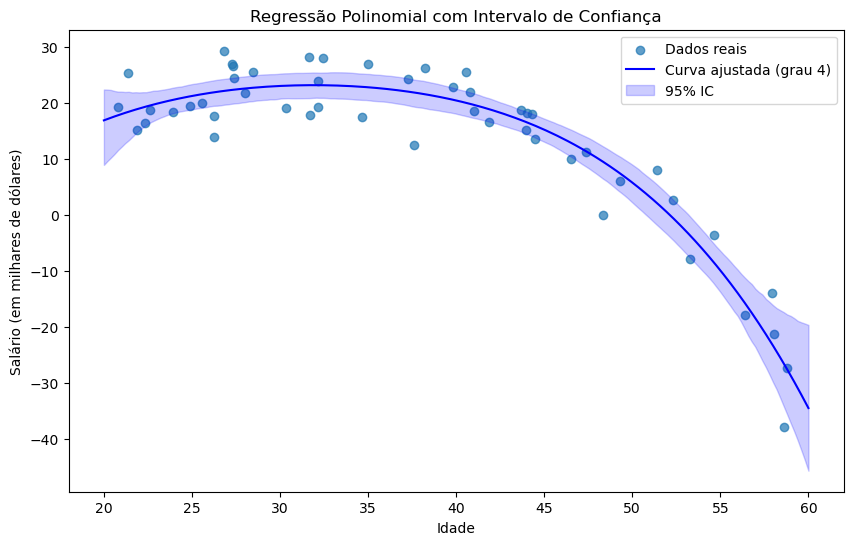

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample

# Dados fictícios
np.random.seed(42)
x = np.random.uniform(20, 60, 50)  # Idade
y = 5 + 0.05 * x**2 - 0.001 * x**3 + np.random.normal(0, 5, size=len(x))  # Salário com ruído

# Ajustar um modelo polinomial de grau 4
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(x.reshape(-1, 1))  # Expandir as features
model = LinearRegression().fit(X_poly, y)

# Previsões para a curva ajustada
x_plot = np.linspace(20, 60, 200).reshape(-1, 1)  # Pontos para plotagem
X_plot_poly = poly.transform(x_plot)
y_pred = model.predict(X_plot_poly)

# 1. Calcular o erro padrão das previsões via bootstrap
n_bootstraps = 1000
bootstrap_preds = np.zeros((n_bootstraps, len(x_plot)))

for i in range(n_bootstraps):
    x_resampled, y_resampled = resample(x, y)  # Amostragem com reposição
    model_boot = LinearRegression().fit(poly.fit_transform(x_resampled.reshape(-1, 1)), y_resampled)
    bootstrap_preds[i, :] = model_boot.predict(X_plot_poly)

# 2. Calcular intervalos de confiança
lower_bound = np.percentile(bootstrap_preds, 2.5, axis=0)
upper_bound = np.percentile(bootstrap_preds, 97.5, axis=0)

# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label="Dados reais", alpha=0.7)
plt.plot(x_plot, y_pred, color="blue", label="Curva ajustada (grau 4)")
plt.fill_between(x_plot.ravel(), lower_bound, upper_bound, color="blue", alpha=0.2, label="95% IC")
plt.xlabel("Idade")
plt.ylabel("Salário (em milhares de dólares)")
plt.legend()
plt.title("Regressão Polinomial com Intervalo de Confiança")
plt.show()


In [2]:
bootstrap_preds.shape

(1000, 200)

In [4]:
lower_bound[:3]

array([ 8.96891734,  9.65281271, 10.26502836])

In [5]:
upper_bound[:3]

array([22.44372626, 22.42067711, 22.3572569 ])

In [7]:
bootstrap_preds[0, :3]

array([15.20561307, 15.61102072, 16.00441626])

In [21]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# Dados de entrada
X = np.array([[2], [3], [4]])

# Criando o objeto PolynomialFeatures
poly = PolynomialFeatures(degree=3)

# Usando fit_transform
X_poly = poly.fit_transform(X)

print(X_poly)


[[ 1.  2.  4.  8.]
 [ 1.  3.  9. 27.]
 [ 1.  4. 16. 64.]]


In [29]:
poly.fit(X)
a = poly.transform(X)


In [30]:
a

array([[ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.],
       [ 1.,  4., 16., 64.]])

In [24]:
X_poly

array([[ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.],
       [ 1.,  4., 16., 64.]])